## FVP Example

In [ ]:
import helpers
import numpy
import pandas as pd

#### Import Data

In [ ]:
# Deepnote Project Local File #
# df = pd.read_csv('./boltfvp.csv', index_col='Athlete', encoding='latin1')

# Deepnote Amazon S3 Connection (SDS Academy S3) #
# !ls /datasets/sdsacademys3/data

df = pd.read_csv('/datasets/sdsacademys3/data/boltfvp.csv', index_col='Athlete', encoding='latin1')
df

,Time (s),Velocity (m/s)
Athlete,,
Bolt,0.0,0.030
Bolt,0.1,0.500
Bolt,0.2,1.040
Bolt,0.3,2.145
Bolt,0.4,3.015
Bolt,0.5,3.055
Bolt,0.6,3.710
Bolt,0.7,3.720
Bolt,0.8,3.895


#### Global Variables

In [ ]:
height = 1.95

bodyweight = 94

max_velocity = df["Velocity (m/s)"].max()

tau = 1.3

#### Model Speed and Acceleration

In [ ]:
df["Model Speed (m/s)"] = helpers.model_speed(
    df["Time (s)"], 
    df["Velocity (m/s)"], 
    max_velocity, 
    tau
)

df["Acceleration (m/s2)"] = helpers.model_acceleration(
    df["Time (s)"], 
    df["Velocity (m/s)"], 
    max_velocity, 
    tau
)

#### Plot Speed and Acceleration

Text(0, 0.5, 'Speed (m/s) and Acceleration (m/s2)')

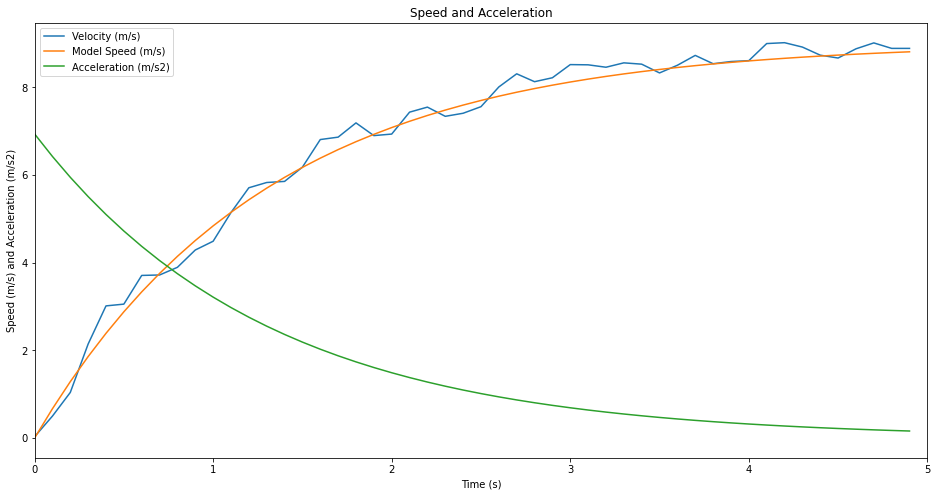

In [ ]:
speed_acc_df = df[["Time (s)", "Velocity (m/s)", "Model Speed (m/s)", "Acceleration (m/s2)"]]
plot = speed_acc_df.plot.line(x="Time (s)", figsize=(16,8), title="Speed and Acceleration")
plot.set_xlim(0,5)
plot.set_ylabel("Speed (m/s) and Acceleration (m/s2)")

#### Model Force and Power

In [ ]:
df["Force (N)"] = helpers.model_force(
    bodyweight, 
    height, 
    df["Acceleration (m/s2)"], 
    df["Model Speed (m/s)"]
)

df["Force (N/kg)"] = df["Force (N)"] / bodyweight

df["Power (W/kg)"] = df["Force (N/kg)"] * df["Model Speed (m/s)"]

#### Plot Force and Power

Text(0, 0.5, 'Power (W/kg)')

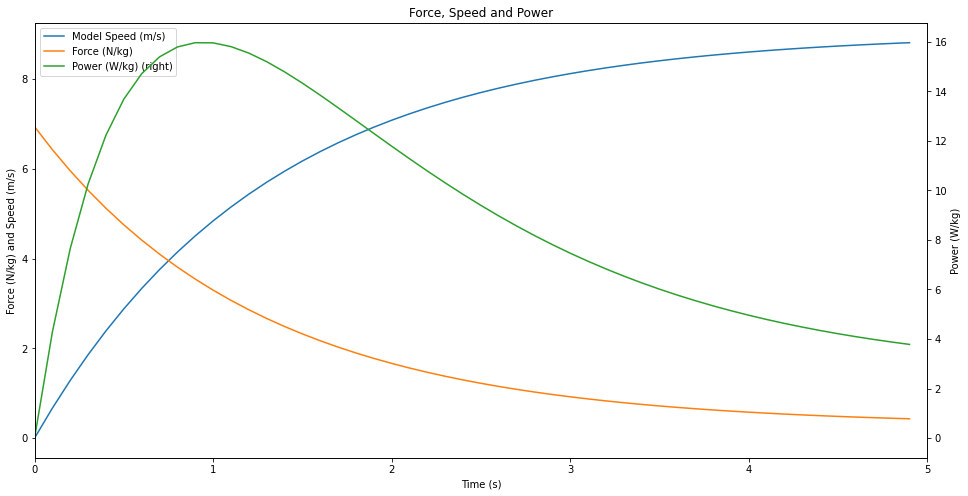

In [ ]:
force_power_df = df[["Time (s)", "Model Speed (m/s)", "Force (N/kg)", "Power (W/kg)"]]
plot = force_power_df.plot.line(x="Time (s)", secondary_y="Power (W/kg)", figsize=(16,8), title="Force, Speed and Power")
plot.set_ylabel("Force (N/kg) and Speed (m/s)")
plot.set_xlim(0,5)
plot.right_ax.set_ylabel("Power (W/kg)")

#### Plot Force-Velocity and Power-Velocity

Text(0, 0.5, 'Power (W/kg)')

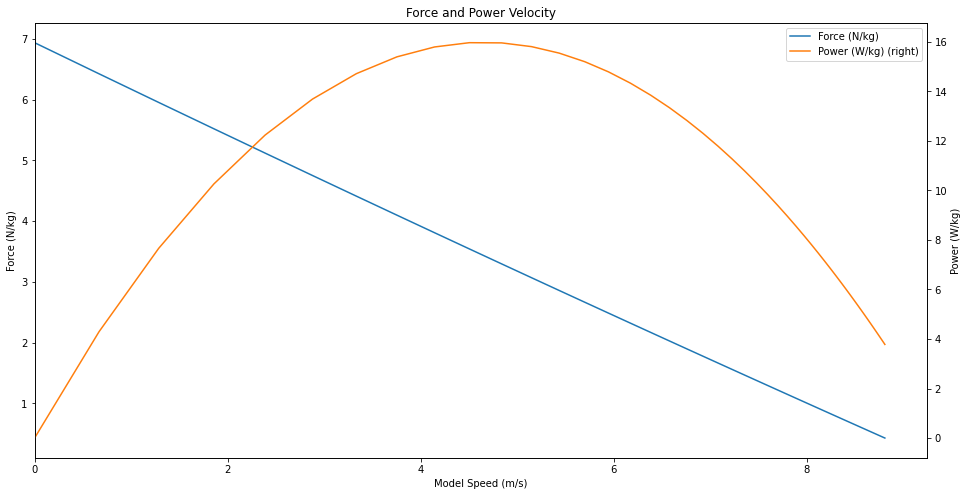

In [ ]:
force_power_velocity_df = df[["Model Speed (m/s)", "Force (N/kg)", "Power (W/kg)"]]
plot = force_power_velocity_df.plot.line(x="Model Speed (m/s)", secondary_y="Power (W/kg)", figsize=(16,8), title="Force and Power Velocity")
plot.set_ylabel("Force (N/kg)")
plot.set_xlim(0)
plot.right_ax.set_ylabel("Power (W/kg)")

#### Model Ratio of Force

In [ ]:
df["Ratio Force (%)"] = helpers.model_ratio_force(
    df["Force (N)"],
    max_velocity,
    bodyweight
)

#### Plot Ratio of Force

Text(0, 0.5, 'Ratio of Force (%)')

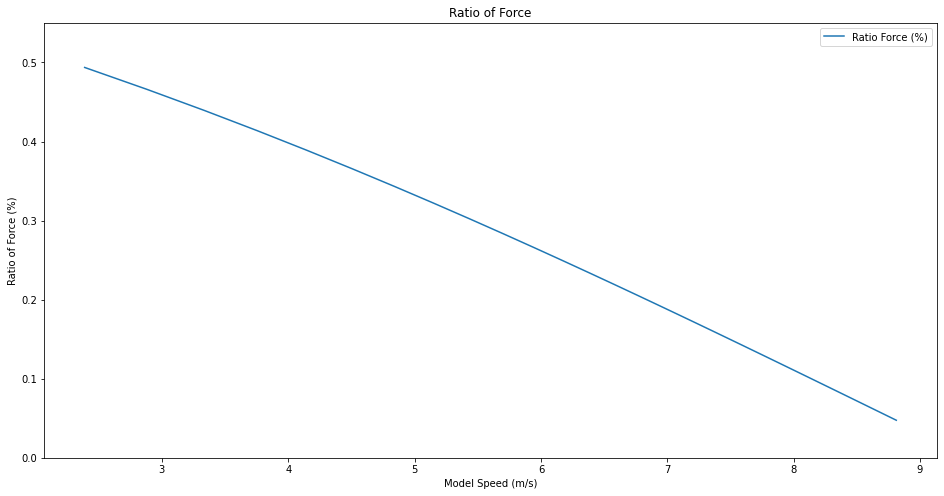

In [ ]:
ratio_of_force_df = df[["Model Speed (m/s)", "Ratio Force (%)"]]
ratio_of_force_df = ratio_of_force_df[df["Ratio Force (%)"] < 0.5] # Filter Rows that have Ratio of Force below 0.5 (50%)
plot = ratio_of_force_df.plot.line(x="Model Speed (m/s)", figsize=(16,8), title="Ratio of Force")
plot.set_ylim(0,0.55)
plot.set_ylabel("Ratio of Force (%)")

#### Calculate FV KPIs

In [ ]:
f0_n = helpers.calc_f0_n(df["Model Speed (m/s)"], df["Force (N)"])
fv_profile_slope = helpers.calc_fv_profile_slope(df["Model Speed (m/s)"], df["Force (N/kg)"])
v0_ms = ((f0_n * -1) / bodyweight) / fv_profile_slope
pmax = f0_n * v0_ms / 4
rf_max = ratio_of_force_df["Ratio Force (%)"].iloc[0] * 100
drf = helpers.calc_fv_profile_slope(ratio_of_force_df["Model Speed (m/s)"], ratio_of_force_df["Ratio Force (%)"])

fv_kpi_set = {
    "F0 (N)": f0_n,
    "F0 (N/kg)": f0_n / bodyweight,
    "V0 (m/s)": v0_ms,
    "Pmax (W)": pmax,
    "Pmax (W/kg)": pmax / bodyweight,
    "FV Profile Slope": fv_profile_slope,
    "RFmax": "{}%".format(round(rf_max, 2)),
    "Drf": "{}%".format(round((drf * 100), 2))
}

for key, value in fv_kpi_set.items():
    print("{}: {}".format(key, value))

F0 (N): 646.0679453811838
F0 (N/kg): 6.873063248735998
V0 (m/s): 9.3713483230476
Pmax (W): 1513.6319391306913
Pmax (W/kg): 16.102467437560545
FV Profile Slope: -0.7334124196229694
RFmax: 49.37%
Drf: -7.18%


In [ ]:
df.to_csv(r'/datasets/sdsacademys3/data/boltfvp_stats.csv')
!ls /datasets/sdsacademys3/data

boltfvp.csv		  psb_data_17_18.csv
boltfvp_stats.csv	  swimming_psb_data.csv
File Challenge.zip	  swimming_psb_data.json
goals_top_2018_2019.csv   transfer_targets.json
goals_top_2018_2019.json  Women200mIndividualMedleyFinal2016.json
goals_top_2018_2019.xlsx  Women200mIndividualMedleyFinal2017.json
goals_top_2018_2019.xml   world_records_athletics.json
Men100mFinal.csv	  world_records_swimming.json
Men100mFinal.json
